In [1]:
import finlab_crypto
finlab_crypto.setup()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-68as7hpb because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is dep

In [3]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '30m')

All caught up..!


In [6]:
import talib
import numpy as np
import pandas as pd
from finlab_crypto import Strategy

In [9]:
csv_file = 'history/BTCUSDT-30m-data.csv'
data_btc30 = pd.read_csv(csv_file)
#data_eth = data_eth.drop(['Date'], axis=1)
data_btc30.describe()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,predict130
count,65676.000000,65676.000000,65676.000000,65676.000000,65676.000000,6.567600e+04,6.567600e+04,65676.000000,65676.000000,6.567600e+04,65676.000000,65676.000000
mean,12649.534505,12707.542276,12587.124430,12649.992505,1024.442990,1.562369e+12,1.646803e+07,13064.233068,511.298077,8.147474e+06,1846.574230,0.493106
std,13029.567960,13096.013086,12957.696085,13029.839610,1177.059431,3.441639e+10,3.235212e+07,17488.545763,579.370622,1.594852e+07,7445.685453,8.337372
min,2830.000000,2940.990000,2817.000000,2820.000000,0.000000,1.500000e+12,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,-100.000000
25%,6501.345000,6519.637500,6485.995000,6501.372500,407.085657,1.530000e+12,2.926581e+06,3440.000000,208.483901,1.500840e+06,0.000000,-2.666710
50%,8628.000000,8661.455000,8584.180000,8628.010000,717.111013,1.560000e+12,5.976390e+06,6851.000000,363.048856,3.032623e+06,0.000000,0.429556
75%,11087.717500,11150.322500,11024.962500,11087.390000,1237.322217,1.590000e+12,1.350551e+07,15050.500000,617.050016,6.656197e+06,0.000000,4.092083
max,64577.250000,64854.000000,64351.520000,64577.260000,26658.428400,1.620000e+12,8.411964e+08,445521.000000,12080.425900,3.749266e+08,79920.622110,46.304354


In [36]:
import sklearn

X = data_btc30.drop(['ignore'], axis=1)
X = X.drop(['predict130'],axis =1)
X = X.drop(['close_time'],axis =1)
X = X.drop(['quote_av'],axis =1)
X = X.drop(['tb_base_av'],axis =1)
X = X.drop(['tb_quote_av'],axis =1)
X = X.drop(['trades'],axis =1)
X = X.drop(['timestamp'],axis =1)
y = data_btc30['predict130']
X.describe()

,open,high,low,close,volume
count,65676.000000,65676.000000,65676.000000,65676.000000,65676.000000
mean,12649.534505,12707.542276,12587.124430,12649.992505,1024.442990
std,13029.567960,13096.013086,12957.696085,13029.839610,1177.059431
min,2830.000000,2940.990000,2817.000000,2820.000000,0.000000
25%,6501.345000,6519.637500,6485.995000,6501.372500,407.085657
50%,8628.000000,8661.455000,8584.180000,8628.010000,717.111013
75%,11087.717500,11150.322500,11024.962500,11087.390000,1237.322217
max,64577.250000,64854.000000,64351.520000,64577.260000,26658.428400


In [37]:
X_train = X.head(65546)

In [27]:
y_train = y.head(65546)

In [28]:
for x in y_train:
    if y_train(x) > 8:
        y_train(x) = '8'
    elif (y_train(x) > 3) & (y_train(x) < 8):
        y_train(x) = '3'
    elif (y_train(x)> -3) & (y_train(x) < 3):
        y_train(x) = '0'
    elif (y_train(x) > -8) & (y_train(x) < -3):
        y_train(x) = '-3'
    elif (y_train(x) < -8):
        y_train(x) = '-8'

SyntaxError: can't assign to function call (<ipython-input-28-127fbf5d23d9>, line 11)

In [41]:
X_train

,open,high,low,close,volume
0,4261.48,4280.56,4261.32,4261.45,11.308926
1,4280.00,4313.62,4267.99,4308.83,35.872083
2,4308.83,4328.69,4304.31,4320.00,21.048648
3,4320.00,4320.00,4291.37,4315.32,2.186268
4,4330.29,4330.29,4309.37,4311.02,3.566277
...,...,...,...,...,...
65541,43206.51,43209.98,42551.33,42610.25,2230.531944
65542,42610.25,42699.44,41310.33,41493.34,5996.699752
65543,41493.34,41699.27,40500.15,40843.52,7347.677180
65544,40843.53,41299.98,40586.93,40834.43,4629.715987


In [18]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train.astype(int))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
print('Random Forest')
print(mean_absolute_percentage_error(y_train, RandomForest.predict(X_train)))

Random Forest
29.837293494573817


In [83]:
#X_test = X.tail(24270)
X_test = X
Result = RandomForest.predict(X_test)

In [84]:
Result

array([ -2,  -5,  -4, ..., -20,  -4,  -4])

In [85]:
cars = {'Result': Result,
        }

df = pd.DataFrame(cars, columns= ['Result'])

df.to_csv ('export_dataframe.csv', index = False, header=True)

print (df)

       Result
0          -2
1          -5
2          -4
3          -4
4          -3
...       ...
65671      -2
65672      -2
65673     -20
65674      -4
65675      -4

[65676 rows x 1 columns]


In [86]:
joblib.dump(Result, 'result_2017.txt')

['result_2017.txt']

In [70]:
np.median(Result)

-7.5

In [75]:
from sklearn.externals import joblib
filename = 'k130_predict.m'
joblib.dump(RandomForest, filename)

['k130_predict.m']

In [74]:
X_test

,open,high,low,close,volume
65666,37835.04,38300.00,37016.34,37613.99,9332.335660
65667,37623.04,37958.07,36444.44,36794.57,9595.162745
65668,36803.28,37500.00,36100.00,37330.16,9572.573738
65669,37330.15,37825.75,37000.00,37033.57,5281.579813
65670,37031.70,37384.49,36729.00,36970.41,4499.764844
65671,36970.41,37352.43,36619.34,37341.74,3900.797426
65672,37341.80,37391.15,36346.80,36512.66,3672.910590
65673,36512.66,37269.00,36511.79,37159.65,3097.734218
65674,37159.65,37169.87,35952.31,36038.38,4585.003738
65675,36040.70,36198.02,35550.76,35787.39,3666.640149


In [5]:
X_2017 = X.head(3000)

In [6]:
X_2017

,open,high,low,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av
timestamp,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4313.62,4261.32,47.181009,1.502946e+12,2.023661e+05,171.0,35.160503,1.509525e+05
2017-08-17 05:00:00+00:00,4308.83,4328.69,4291.37,23.234916,1.502950e+12,1.003048e+05,102.0,21.448071,9.260828e+04
2017-08-17 06:00:00+00:00,4330.29,4345.45,4309.37,7.229691,1.502953e+12,3.128231e+04,36.0,4.802861,2.079532e+04
2017-08-17 07:00:00+00:00,4316.62,4349.99,4287.41,4.443249,1.502957e+12,1.924106e+04,25.0,2.602292,1.129135e+04
2017-08-17 08:00:00+00:00,4333.32,4377.85,4333.32,0.972807,1.502960e+12,4.239504e+03,28.0,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...
2017-12-20 06:00:00+00:00,16300.00,16386.61,15806.09,855.589448,1.513753e+12,1.375726e+07,7329.0,338.236811,5.445514e+06
2017-12-20 07:00:00+00:00,16195.98,16740.00,16000.00,608.449205,1.513757e+12,9.968101e+06,4983.0,278.128135,4.563836e+06
2017-12-20 08:00:00+00:00,16360.00,17000.78,16300.00,540.761718,1.513760e+12,8.985783e+06,3807.0,231.501890,3.849400e+06


In [7]:
X_future = X.drop(X.head(11031).index)
X_future = X_future.dropna()
X_future.describe()

,open,high,low,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av
count,20729.000000,20729.000000,20729.000000,20729.000000,2.072900e+04,2.072900e+04,20729.000000,20729.000000,2.072900e+04
mean,12995.287619,13072.534929,12912.170453,2488.397483,1.580310e+12,3.763050e+07,32186.788268,1235.508770,1.862157e+07
std,12583.194863,12680.392646,12480.513538,2359.378569,2.159555e+10,5.968116e+07,33062.673690,1162.510271,2.973671e+07
min,3172.620000,3184.750000,3156.260000,0.000000,1.542902e+12,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7134.960000,7160.000000,7100.000000,1132.501932,1.561615e+12,8.409853e+06,11609.000000,570.793888,4.245023e+06
50%,9257.990000,9287.950000,9226.220000,1829.099887,1.580314e+12,1.658735e+07,20465.000000,904.877668,8.171925e+06
75%,11402.790000,11448.590000,11363.370000,2971.235212,1.599012e+12,3.688134e+07,39721.000000,1479.853826,1.802746e+07
max,61648.260000,61844.000000,61089.980000,47255.762685,1.617692e+12,1.252120e+09,554876.000000,20628.794047,6.363879e+08


In [8]:
X = X.drop(X.tail(240).index)
X = X.dropna()
X.describe()

,open,high,low,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av
count,31520.000000,31520.000000,31520.000000,31520.000000,3.152000e+04,3.152000e+04,31520.000000,31520.000000,3.152000e+04
mean,10861.000891,10932.030793,10784.463458,1991.183224,1.559944e+12,2.681074e+07,23192.590609,995.619216,1.331955e+07
std,9817.838615,9900.435297,9730.303310,2125.942191,3.287582e+10,4.963328e+07,29209.586341,1046.639863,2.466813e+07
min,2870.900000,2950.000000,2817.000000,0.000000,1.502946e+12,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,6458.315000,6483.000000,6435.000000,834.787691,1.531522e+12,5.912276e+06,6892.750000,430.768877,3.063843e+06
50%,8383.615000,8434.665000,8328.000000,1438.626869,1.559983e+12,1.169014e+07,13235.500000,730.542878,5.955578e+06
75%,10638.477500,10697.985000,10570.000000,2444.748222,1.588425e+12,2.382369e+07,26834.500000,1219.186704,1.181167e+07
max,61648.260000,61844.000000,61089.980000,47255.762685,1.616828e+12,1.252120e+09,554876.000000,20628.794047,6.363879e+08


In [9]:
y = y.drop(y.head(240).index)
y = y.dropna()


In [ ]:
y.describe()

In [ ]:
y.head()

In [10]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)[source]

In [11]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [14]:
from sklearn.ensemble import RandomForestRegressor
regr2 = RandomForestRegressor(max_depth=6, random_state=0)
regr2.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
from sklearn.svm import SVR

svm = SVR(kernel = 'linear',degree =2)
svm.fit(X, y) 

In [ ]:
#MAPE = mean_absolute_percentage_error(y, logreg.predict(X))
MAPE = mean_absolute_percentage_error(y, regr.predict(X))
print(MAPE)

In [13]:
from sklearn.ensemble import RandomForestClassifier
regr2 = RandomForestClassifier(max_depth=1, random_state=0)
regr2.fit(X, y.astype(int))

KeyboardInterrupt: 

(-1574.95, 33095.95, -17.463000000000193, 64584.723000000005)

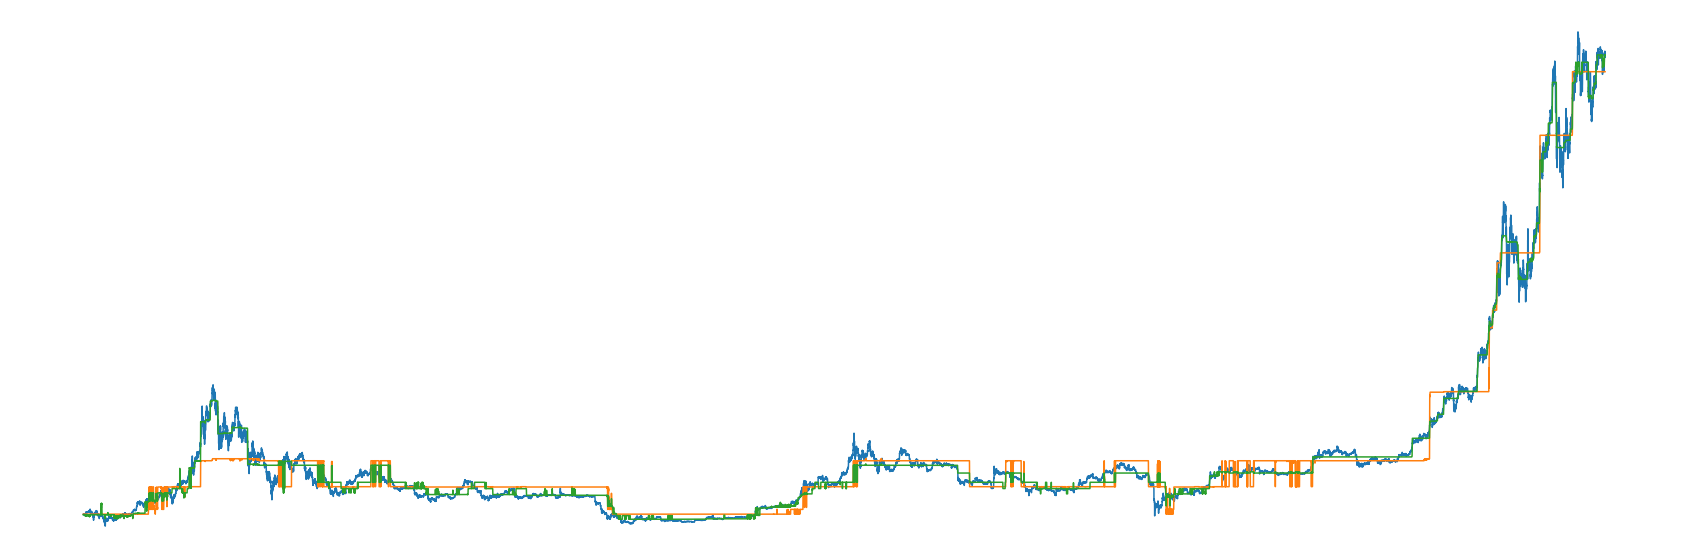

In [16]:
import matplotlib.pyplot as plt
date = []
date.extend(range(1, 31521))
plt.figure(figsize = (30,10))
plt.plot(date,y, date, regr.predict(X), date, regr2.predict(X))
plt.axis('off')

In [17]:
print(regr2.predict(X_future))

[ 4403.93424945  4403.93424945  4403.93424945 ... 58917.4078284
 58917.4078284  58917.4078284 ]


In [ ]:
plt.figure(figsize = (30,10))
plt.plot(date,y,  date, regr2.predict(X))
plt.axis('on')

In [ ]:
@Strategy(timeperiod=14,sma1=20,sma2=60,n=20,m=40)
def sar_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sar_strategy.sma1).mean()
  sma60 = close.rolling(sar_strategy.sma2).mean()

  median = ohlcv.close.rolling(sar_strategy.n).median()
  p1 = ohlcv.close > median
  p2 = ohlcv.close.shift() > median
  mmi = (p1 & p2).astype(int).rolling(sar_strategy.m).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift()) & (mmi > 0.5)
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift()) 
  figures = {'overlaps': {'sma20': sma20, 'sma60': sma60}}
  return entries, exits, figures

variables = {'sma1': np.arange(2,100,2),
             'sma2': np.arange(2,130,2),
             'n':np.arange(1,50,1),
             'm':np.arange(1,40,1)
             }

sar_strategy.backtest(ohlcv, variables=variables , freq='1h', plot=True)